# Data Wrangling - Petfinder API

## Data Collection

Goal: Organize your data to streamline the next steps of your capstone

Time estimate: 1-2 hours 

■ Data loading

■ Data joining

In [1]:
# Import Libraries
import pandas as pd
import os
import petpy
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

from library.sb_utils import save_file

In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Dogs Data

In [3]:
dogs_df = pd.read_csv('data/dogs_2019.csv')
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38598 entries, 0 to 38597
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38598 non-null  int64  
 1   organization_id         38598 non-null  object 
 2   url                     38598 non-null  object 
 3   type                    38598 non-null  object 
 4   species                 38598 non-null  object 
 5   breeds                  38598 non-null  object 
 6   colors                  38598 non-null  object 
 7   age                     38598 non-null  object 
 8   gender                  38598 non-null  object 
 9   size                    38598 non-null  object 
 10  coat                    33888 non-null  object 
 11  attributes              38598 non-null  object 
 12  environment             38598 non-null  object 
 13  tags                    38598 non-null  object 
 14  name                    38598 non-null

In [4]:
dogs_df.sort_values('id', inplace=True)
dogs_df.dtypes

id                          int64
organization_id            object
url                        object
type                       object
species                    object
breeds                     object
colors                     object
age                        object
gender                     object
size                       object
coat                       object
attributes                 object
environment                object
tags                       object
name                       object
description                object
organization_animal_id     object
photos                     object
primary_photo_cropped      object
videos                     object
status                     object
status_changed_at          object
published_at               object
distance                  float64
contact                    object
_links                     object
dtype: object

In [5]:
dogs_df.head()

,id,organization_id,url,type,species,breeds,colors,age,gender,size,coat,attributes,environment,tags,name,description,organization_animal_id,photos,primary_photo_cropped,videos,status,status_changed_at,published_at,distance,contact,_links
2568,43669471,WA664,https://www.petfinder.com/dog/drogo-43669471/wa/bellingham/misunderstood-mutts-rescue-wa664/?referrer_id=2f113f8e-5c9f-4549-8db9-e9e1309fd172,Dog,Dog,"{'primary': 'Chihuahua', 'secondary': 'Miniature Pinscher', 'mixed': True, 'unknown': False}","{'primary': 'Bicolor', 'secondary': None, 'tertiary': None}",Adult,Male,Small,Short,"{'spayed_neutered': True, 'house_trained': True, 'declawed': None, 'special_needs': False, 'shots_current': True}","{'children': True, 'dogs': True, 'cats': True}","['Active', 'Sweet']",Drogo,Meet Drogo - This 5yr old little man has a new lease on life! Rescued from living under a house...,NaN,"[{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/3/?bust=1546363699&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/3/?bust=1546363699&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/3/?bust=1546363699&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/3/?bust=1546363699'}, {'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/1/?bust=1549317931&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/1/?bust=1549317931&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/1/?bust=1549317931&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/1/?bust=1549317931'}, {'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/2/?bust=1549317932&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/2/?bust=1549317932&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/2/?bust=1549317932&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/2/?bust=1549317932'}, {'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/4/?bust=1547943486&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/4/?bust=1547943486&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/4/?bust=1547943486&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/4/?bust=1547943486'}, {'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/5/?bust=1547943487&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/5/?bust=1547943487&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/5/?bust=1547943487&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/5/?bust=1547943487'}, {'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/6/?bust=1547943487&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/6/?bust=1547943487&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/6/?bust=1547943487&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/6/?bust=1547943487'}]","{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/3/?bust=1546363699&width=300', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/3/?bust=1546363699&width=450', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/3/?bust=1546363699&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43669471/3/?bust=1546363699'}",[],adopted,2019-02-19T02:56:20+0000,2019-01-01T17:33:38+0000,8.37,"{'email': 'adopt@misunderstoodmutts.org', 'phone': None, 'address': {'address1': 'PO Box 6082', 'address2': None, 'city': 'Bellingham', 'state': 'WA', 'postcode': '98227', 'country': 'US'}}","{'self': {'href': '/v2/animals/43669471'}, 'type': {'href': '/v2/types/dog'}, 'organization': {'href': '/v2/organizations/wa664'}}"
5601,

In [6]:
dogs_df['id'].duplicated().sum()

28960

In [7]:
dogs_df = dogs_df[~dogs_df['id'].duplicated()]
dogs_df.shape

(9638, 26)

In [8]:
dogs_df.set_index('id', inplace=True)

In [9]:
dogs_df.dtypes

organization_id            object
url                        object
type                       object
species                    object
breeds                     object
colors                     object
age                        object
gender                     object
size                       object
coat                       object
attributes                 object
environment                object
tags                       object
name                       object
description                object
organization_animal_id     object
photos                     object
primary_photo_cropped      object
videos                     object
status                     object
status_changed_at          object
published_at               object
distance                  float64
contact                    object
_links                     object
dtype: object

All columns are datatype objects. There are two columns that should be datetimes: published_at and status_changed_at.

In [10]:
dtformat = '%Y-%m-%d'

dogs_df['published_at'] = pd.to_datetime(dogs_df['published_at'], format=dtformat)
dogs_df['status_changed_at'] = pd.to_datetime(dogs_df['status_changed_at'], format=dtformat)

dogs_df[['published_at', 'status_changed_at']].dtypes

published_at         datetime64[ns, UTC]
status_changed_at    datetime64[ns, UTC]
dtype: object

In [11]:
time_before_adopted = dogs_df['status_changed_at'] - dogs_df['published_at']

In [12]:
time_before_adopted_in_days = time_before_adopted / timedelta(days=1)

time_before_adopted_in_days.describe()

count    9638.00
mean       40.76
std        75.11
min         0.00
25%         6.84
50%        16.39
75%        40.93
max       833.94
dtype: float64

In [13]:
dogs_df['duration_as_adoptable'] = time_before_adopted_in_days

In [14]:
dogs_df.sample(10)[['published_at', 'status_changed_at', 'duration_as_adoptable']]

,published_at,status_changed_at,duration_as_adoptable
id,,,
43846002,2019-01-24 06:18:20+00:00,2019-02-12 22:31:12+00:00,19.68
45288226,2019-07-18 05:49:15+00:00,2019-07-25 02:24:45+00:00,6.86
45341307,2019-07-23 16:55:23+00:00,2019-07-25 03:23:01+00:00,1.44
44477993,2019-04-16 22:30:39+00:00,2019-05-01 19:58:17+00:00,14.89
43845997,2019-01-24 06:11:28+00:00,2019-02-12 22:31:46+00:00,19.68
46695749,2019-11-27 02:08:00+00:00,2019-11-27 07:29:43+00:00,0.22
46482771,2019-11-05 17:26:17+00:00,2019-11-19 00:33:52+00:00,13.30
44482412,2019-04-17 04:22:13+00:00,2019-04-20 22:12:11+00:00,3.74
46258382,2019-10-12 20:15:41+00:00,2019-11-11 01:11:13+00:00,29.21


In [15]:
(dogs_df['duration_as_adoptable'] <= 0).sum()

36

In [16]:
dogs_df = dogs_df[dogs_df['duration_as_adoptable'] >= 0]

In [17]:
dogs_df['duration_as_adoptable'].describe()

count    9638.00
mean       40.76
std        75.11
min         0.00
25%         6.84
50%        16.39
75%        40.93
max       833.94
Name: duration_as_adoptable, dtype: float64

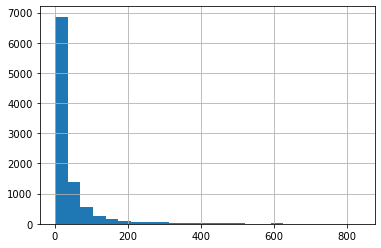

In [18]:
# plot duration column
dogs_df['duration_as_adoptable'].hist(bins=24)
plt.xlabel = 'Days Before Adoption'
plt.ylabel = 'Amount'
plt.show()

The length of time that a pet has been up for adoption seems low, even after deleting all of the rows where the duration == 0. 

It's important to note that these durations are only within the petfinder system; they do not reflect if an animal was added to the system the day of or several days after being admitted to the adoption facility. The datetimes are likely generated by the system, so they are whenever the facility uploads their animals and whenever they declare a pet to be adopted.

In [19]:
dogs_df.tail(5)[['published_at', 'status_changed_at', 'duration_as_adoptable']]

,published_at,status_changed_at,duration_as_adoptable
id,,,
46999774,2020-01-01 01:32:00+00:00,2020-02-12 01:42:41+00:00,42.01
46999792,2020-01-01 01:47:35+00:00,2020-02-20 19:37:52+00:00,50.74
46999984,2020-01-01 02:42:54+00:00,2020-01-10 05:56:10+00:00,9.13
47000081,2020-01-01 03:19:37+00:00,2020-02-22 20:10:53+00:00,52.70
47000144,2020-01-01 03:49:45+00:00,2020-02-07 00:18:42+00:00,36.85


In [20]:
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9638 entries, 43669471 to 47000144
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   organization_id         9638 non-null   object             
 1   url                     9638 non-null   object             
 2   type                    9638 non-null   object             
 3   species                 9638 non-null   object             
 4   breeds                  9638 non-null   object             
 5   colors                  9638 non-null   object             
 6   age                     9638 non-null   object             
 7   gender                  9638 non-null   object             
 8   size                    9638 non-null   object             
 9   coat                    8424 non-null   object             
 10  attributes              9638 non-null   object             
 11  environment             9638 non

In [21]:
dogs_df.drop(columns='organization_animal_id', inplace=True)
dogs_df.shape

(9638, 25)

# Cats Data

In [22]:
cats_df = pd.read_csv('data/cats_2019.csv')
cats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28176 entries, 0 to 28175
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      28176 non-null  int64  
 1   organization_id         28176 non-null  object 
 2   url                     28176 non-null  object 
 3   type                    28176 non-null  object 
 4   species                 28176 non-null  object 
 5   breeds                  28176 non-null  object 
 6   colors                  28176 non-null  object 
 7   age                     28176 non-null  object 
 8   gender                  28176 non-null  object 
 9   size                    28176 non-null  object 
 10  coat                    26408 non-null  object 
 11  attributes              28176 non-null  object 
 12  environment             28176 non-null  object 
 13  tags                    28176 non-null  object 
 14  name                    28176 non-null

In [23]:
cats_df.sort_values('id', inplace=True)

In [24]:
cats_df.head()

,id,organization_id,url,type,species,breeds,colors,age,gender,size,coat,attributes,environment,tags,name,description,organization_animal_id,photos,primary_photo_cropped,videos,status,status_changed_at,published_at,distance,contact,_links
388,41207246,WA125,https://www.petfinder.com/cat/bella-41207246/wa/bremerton/animal-rescue-families-wa125/?referrer_id=2f113f8e-5c9f-4549-8db9-e9e1309fd172,Cat,Cat,"{'primary': 'Tabby', 'secondary': 'Domestic Short Hair', 'mixed': True, 'unknown': False}","{'primary': 'Black', 'secondary': None, 'tertiary': None}",Baby,Female,Small,Short,"{'spayed_neutered': True, 'house_trained': False, 'declawed': False, 'special_needs': False, 'shots_current': True}","{'children': True, 'dogs': None, 'cats': True}",['Very sociable litle kitty'],Bella,"Bella has been adopted!!!!!!! \n\nBella, 8 weeks old, one of a litter of 3. Vaccinated, dewormed, spayed. Adoption fee is...",NaN,"[{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245'}]","{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245&width=300', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245&width=450', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245'}",[],adopted,2019-04-02T13:18:02+0000,2019-03-04T14:17:47+0000,8.23,"{'email': 'arf@silverlink.net', 'phone': '360-698-6576 ', 'address': {'address1': 'PO Box 165', 'address2': None, 'city': 'Bremerton', 'state': 'WA', 'postcode': '98337', 'country': 'US'}}","{'self': {'href': '/v2/animals/41207246'}, 'type': {'href': '/v2/types/cat'}, 'organization': {'href': '/v2/organizations/wa125'}}"
1686,41207246,WA125,https://www.petfinder.com/cat/bella-41207246/wa/bremerton/animal-rescue-families-wa125/?referrer_id=2f113f8e-5c9f-4549-8db9-e9e1309fd172,Cat,Cat,"{'primary': 'Tabby', 'secondary': 'Domestic Short Hair', 'mixed': True, 'unknown': False}","{'primary': 'Black', 'secondary': None, 'tertiary': None}",Baby,Female,Small,Short,"{'spayed_neutered': True, 'house_trained': False, 'declawed': False, 'special_needs': False, 'shots_current': True}","{'children': True, 'dogs': None, 'cats': True}",['Very sociable litle kitty'],Bella,"Bella has been adopted!!!!!!! \n\nBella, 8 weeks old, one of a litter of 3. Vaccinated, dewormed, spayed. Adoption fee is...",NaN,"[{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245'}]","{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245&width=300', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245&width=450', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/41207246/1/?bust=1521388245'}",[],adopted,2019-04-02T13:18:02+0000,2019-03-04T14:17:47+0000,4.39,"{'email': 'arf@silverlink.net', 'phone': '360-698-6576 ', 'address': {'address1': 'PO Box 165', 'address2': None, 'city': 'Bremerton', 'state': 'WA', 'postcode': '98337', 'country': 'US'}}","{'self': {'href': '/v2/animals/41207246'}, 'type': {'href': '/v2/types/cat'}, 'organization': {'href': '/v2/organizations/wa125'}}"
4890,41207246,WA125,https://www.petfinder.com/cat/bella-41207246/wa/breme

In [25]:
cats_df['id'].duplicated().sum()

21190

In [26]:
cats_df = cats_df[~cats_df['id'].duplicated()]
cats_df.shape

(6986, 26)

In [27]:
cats_df.set_index('id', inplace=True)

In [28]:
cats_df.dtypes

organization_id            object
url                        object
type                       object
species                    object
breeds                     object
colors                     object
age                        object
gender                     object
size                       object
coat                       object
attributes                 object
environment                object
tags                       object
name                       object
description                object
organization_animal_id     object
photos                     object
primary_photo_cropped      object
videos                     object
status                     object
status_changed_at          object
published_at               object
distance                  float64
contact                    object
_links                     object
dtype: object

All columns are datatype objects. There are two columns that should be datetimes: published_at and status_changed_at.

In [29]:
dtformat = '%Y-%m-%d'

cats_df['published_at'] = pd.to_datetime(cats_df['published_at'], format=dtformat)
cats_df['status_changed_at'] = pd.to_datetime(cats_df['status_changed_at'], format=dtformat)

cats_df[['published_at', 'status_changed_at']].dtypes

published_at         datetime64[ns, UTC]
status_changed_at    datetime64[ns, UTC]
dtype: object

In [30]:
time_before_adopted = cats_df['status_changed_at'] - cats_df['published_at']

In [31]:
time_before_adopted_in_days = time_before_adopted / timedelta(days=1)

time_before_adopted_in_days.describe()

count    6986.00
mean       32.27
std        63.64
min         0.00
25%         3.83
50%        11.77
75%        32.85
max       779.00
dtype: float64

In [32]:
cats_df['duration_as_adoptable'] = time_before_adopted_in_days

In [33]:
cats_df.sample(10)[['published_at', 'status_changed_at', 'duration_as_adoptable']]

,published_at,status_changed_at,duration_as_adoptable
id,,,
44345055,2019-03-29 19:41:58+00:00,2019-04-01 22:30:50+00:00,3.12
46459766,2019-11-02 19:57:29+00:00,2019-11-04 00:25:49+00:00,1.19
46945001,2019-12-26 23:20:10+00:00,2019-12-26 23:49:26+00:00,0.02
45174388,2019-07-05 15:53:52+00:00,2019-07-07 03:21:45+00:00,1.48
45566015,2019-08-10 01:59:22+00:00,2019-09-28 19:23:26+00:00,49.73
44680445,2019-05-13 06:17:47+00:00,2019-05-30 22:24:51+00:00,17.67
45132051,2019-06-30 22:52:55+00:00,2019-08-13 20:56:14+00:00,43.92
45972622,2019-09-14 16:28:25+00:00,2019-10-10 00:44:17+00:00,25.34
44426341,2019-04-10 02:00:34+00:00,2019-05-03 22:33:26+00:00,23.86


In [34]:
(cats_df['duration_as_adoptable'] <= 0).sum()

21

In [35]:
cats_df = cats_df[cats_df['duration_as_adoptable'] >= 0]

In [36]:
cats_df['duration_as_adoptable'].describe()

count    6986.00
mean       32.27
std        63.64
min         0.00
25%         3.83
50%        11.77
75%        32.85
max       779.00
Name: duration_as_adoptable, dtype: float64

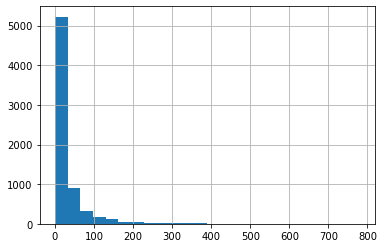

In [37]:
# plot duration column
cats_df['duration_as_adoptable'].hist(bins=24)
plt.xlabel = 'Days Before Adoption'
plt.ylabel = 'Amount'
plt.show()

The length of time that a pet has been up for adoption seems low, even after deleting all of the rows where the duration == 0. 

It's important to note that these durations are only within the petfinder system; they do not reflect if an animal was added to the system the day of or several days after being admitted to the adoption facility. The datetimes are likely generated by the system, so they are whenever the facility uploads their animals and whenever they declare a pet to be adopted.

In [38]:
cats_df.tail(5)[['published_at', 'status_changed_at', 'duration_as_adoptable']]

,published_at,status_changed_at,duration_as_adoptable
id,,,
46982857,2019-12-31 21:50:52+00:00,2020-01-02 04:55:43+00:00,1.30
46999447,2020-01-01 00:30:08+00:00,2020-01-06 21:27:20+00:00,5.87
46999452,2020-01-01 00:33:11+00:00,2020-01-06 21:29:11+00:00,5.87
47000478,2020-01-01 07:40:38+00:00,2020-01-03 20:59:55+00:00,2.56
47000487,2020-01-01 05:16:23+00:00,2020-01-12 02:42:42+00:00,10.89


In [39]:
cats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6986 entries, 41207246 to 47000487
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   organization_id         6986 non-null   object             
 1   url                     6986 non-null   object             
 2   type                    6986 non-null   object             
 3   species                 6986 non-null   object             
 4   breeds                  6986 non-null   object             
 5   colors                  6986 non-null   object             
 6   age                     6986 non-null   object             
 7   gender                  6986 non-null   object             
 8   size                    6986 non-null   object             
 9   coat                    6742 non-null   object             
 10  attributes              6986 non-null   object             
 11  environment             6986 non

In [40]:
cats_df.drop(columns='organization_animal_id', inplace=True)
cats_df.shape

(6986, 25)

## Organizations

In [41]:
orgs_df = pd.read_csv('data/orgs_2019.csv')
orgs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      245 non-null    object 
 1   name                    245 non-null    object 
 2   email                   242 non-null    object 
 3   phone                   155 non-null    object 
 4   url                     245 non-null    object 
 5   website                 150 non-null    object 
 6   mission_statement       148 non-null    object 
 7   photos                  245 non-null    object 
 8   distance                0 non-null      float64
 9   address.address1        101 non-null    object 
 10  address.address2        18 non-null     object 
 11  address.city            245 non-null    object 
 12  address.state           245 non-null    object 
 13  address.postcode        245 non-null    int64  
 14  address.country         245 non-null    ob

In [42]:
orgs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      245 non-null    object 
 1   name                    245 non-null    object 
 2   email                   242 non-null    object 
 3   phone                   155 non-null    object 
 4   url                     245 non-null    object 
 5   website                 150 non-null    object 
 6   mission_statement       148 non-null    object 
 7   photos                  245 non-null    object 
 8   distance                0 non-null      float64
 9   address.address1        101 non-null    object 
 10  address.address2        18 non-null     object 
 11  address.city            245 non-null    object 
 12  address.state           245 non-null    object 
 13  address.postcode        245 non-null    int64  
 14  address.country         245 non-null    ob

In [43]:
orgs_wa = orgs_df[['id', 'address.city']].set_index('id')
orgs_wa.sample(10)

,address.city
id,
WA704,Sammamish
WA668,Yakima
WA255,Long Beach
WA127,Puyallup
WA219,Ocean Shores
WA368,Seattle
WA47,Seattle
WA330,Longview
WA7,Bellingham


In [44]:
city_adopted = pd.DataFrame.to_dict(orgs_wa)

In [45]:
city_adopted = city_adopted['address.city']
print(city_adopted)

{'WA193': 'Yakima', 'WA687': 'Yakima', 'WA447': 'Yakima', 'WA461': 'Kirkland', 'WA39': 'Redmond', 'WA401': 'Des Moines', 'WA446': 'Olympia', 'WA674': 'Onalaska', 'WA08': 'Bremerton', 'WA694': 'Gig Harbor', 'WA127': 'Puyallup', 'WA91': 'Leavenworth', 'WA135': 'Camano Island', 'WA668': 'Yakima', 'WA380': 'Roslyn', 'WA325': 'Bainbridge Island', 'WA441': 'Seattle', 'WA430': 'Anacortes', 'WA602': 'Newport', 'WA307': 'Issaquah', 'WA573': 'Lacey', 'WA503': 'Seattle', 'WA214': 'Seattle', 'WA531': 'Bonney Lake', 'WA682': 'Bonney Lake', 'WA669': 'Puyallup', 'WA701': 'Vancouver', 'WA77': 'Seattle', 'WA169': 'Oak Harbor', 'WA167': 'Sultan', 'WA403': 'Union Gap', 'WA422': 'Bothell', 'WA149': 'Auburn', 'WA350': 'Olalla', 'WA575': 'Seattle', 'WA593': 'Oakville', 'WA283': 'Woodinville', 'WA688': 'Ferndale', 'WA686': 'Spokane', 'WA66': 'Redmond', 'WA389': 'Vancouver', 'WA658': 'Tacoma', 'WA486': 'Quincy', 'WA237': 'Edmonds', 'WA51': 'Gig Harbor', 'WA663': 'Mount Vernon', 'WA675': 'Seattle', 'WA497': 'A

In [46]:
# add city name to dogs and cats dataframes
dogs_df['city'] = dogs_df['organization_id'].map(city_adopted)
cats_df['city'] = cats_df['organization_id'].map(city_adopted)

In [47]:
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9638 entries, 43669471 to 47000144
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   organization_id        9638 non-null   object             
 1   url                    9638 non-null   object             
 2   type                   9638 non-null   object             
 3   species                9638 non-null   object             
 4   breeds                 9638 non-null   object             
 5   colors                 9638 non-null   object             
 6   age                    9638 non-null   object             
 7   gender                 9638 non-null   object             
 8   size                   9638 non-null   object             
 9   coat                   8424 non-null   object             
 10  attributes             9638 non-null   object             
 11  environment            9638 non-null   object

In [48]:
dogs_df.sample(5)

,organization_id,url,type,species,breeds,colors,age,gender,size,coat,attributes,environment,tags,name,description,photos,primary_photo_cropped,videos,status,status_changed_at,published_at,distance,contact,_links,duration_as_adoptable,city
id,,,,,,,,,,,,,,,,,,,,,,,,,,
43979407,TX2091,https://www.petfinder.com/dog/freddy-43979407/wa/seattle/k9kare-tx2091/?referrer_id=2f113f8e-5c9f-4549-8db9-e9e1309fd172,Dog,Dog,"{'primary': 'Schnauzer', 'secondary': None, 'mixed': True, 'unknown': False}","{'primary': 'Brindle', 'secondary': None, 'tertiary': None}",Baby,Male,Medium,Medium,"{'spayed_neutered': False, 'house_trained': False, 'declawed': None, 'special_needs': False, 'shots_current': True}","{'children': True, 'dogs': True, 'cats': True}",[],Freddy,Meet Freddy! Freddy along with his brother and mom were just saved from a high kill shelter!\nEven though the...,"[{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43979407/1/?bust=1549760116&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43979407/1/?bust=1549760116&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43979407/1/?bust=1549760116&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43979407/1/?bust=1549760116'}]","{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43979407/1/?bust=1549760116&width=300', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43979407/1/?bust=1549760116&width=450', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43979407/1/?bust=1549760116&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/43979407/1/?bust=1549760116'}",[],adopted,2019-02-10 05:40:53+00:00,2019-02-10 01:02:09+00:00,5.79,"{'email': 'k9kareadoptme@gmail.com', 'phone': None, 'address': {'address1': None, 'address2': None, 'city': 'Seattle', 'state': 'WA', 'postcode': '98133', 'country': 'US'}}","{'self': {'href': '/v2/animals/43979407'}, 'type': {'href': '/v2/types/dog'}, 'organization': {'href': '/v2/organizations/tx2091'}}",0.19,NaN
45058868,WA219,https://www.petfinder.com/dog/tonka-45058868/wa/ocean-shores/north-beach-paws-wa219/?referrer_id=2f113f8e-5c9f-4549-8db9-e9e1309fd172,Dog,Dog,"{'primary': 'American Staffordshire Terrier', 'secondary': 'Mixed Breed', 'mixed': True, 'unknown': False}","{'primary': 'Apricot / Beige', 'secondary': 'White / Cream', 'tertiary': None}",Adult,Female,Large,Short,"{'spayed_neutered': True, 'house_trained': True, 'declawed': None, 'special_needs': False, 'shots_current': True}","{'children': True, 'dogs': False, 'cats': False}",[],Tonka,"When adopted, all of our dogs are spayed/neutered, their vaccinations are current, they are treated for fleas and worms, and...","[{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/45058868/2/?bust=1561253510&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/45058868/2/?bust=1561253510&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/45058868/2/?bust=1561253510&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/45058868/2/?bust=1561253510'}, {'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/45058868/1/?bust=1561253307&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/45058868/1/?bust=1561253307&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/45058868/1/?bust=1561253307&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/45058868/1/?bust=1561253307'}, {'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/45058868/3/?bust=1561253563&width=100', 'medium': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/45058868/3/?bust=1561253563&width=300', 'large': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/45058868/3/?bust=1561253563&width=600', 'full': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/45058868/3/?bust=1561253563'}]","{'small': 'https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/45058868/2/?bust=1561253510&width=300', 'medium': 'https://d

In [49]:
city_adopted['WA470']

'Puyallup'

In [50]:
dogs_df['organization_id'].unique()

array(['WA664', 'WA526', 'WA162', 'WA214', 'WA219', 'WA477', 'OR372',
       'ID150', 'WA7', 'WA633', 'WA49', 'WA68', 'WA553', 'WA538', 'WA07',
       'WA262', 'WA581', 'WA391', 'TX1709', 'WA577', 'TX2293', 'TX2091',
       'WA109', 'WA403', 'WA02', 'WA614', 'WA470', 'WA476', 'WA56',
       'WA118', 'WA138', 'WA422', 'WA544', 'WA241', 'WA175', 'WA419',
       'OR187', 'WA148', 'WA255', 'WY13', 'AZ41', 'WA573', 'OR158',
       'WA193', 'CA2261', 'TX2308', 'WA486', 'WA424', 'WA48', 'WA203',
       'WA605', 'WA123', 'TX1285', 'WA52', 'WA127', 'WA53', 'WA353',
       'TX2226', 'WA649', 'WA519', 'WA224', 'OR342', 'WA606', 'WA672',
       'OR285', 'OR123', 'WA132', 'WA135', 'WA330', 'WA472', 'TX1931',
       'WA142', 'WA617', 'WA644', 'WA66', 'WA503', 'WA368', 'WA660',
       'WA73', 'WA613', 'WA380', 'WA642', 'WA630', 'TX2305', 'TX2045',
       'WA523', 'WA604', 'WA653', 'OR367', 'WA652', 'WA169', 'WA149',
       'WA119', 'WA389', 'WA447', 'TX2271', 'TX364', 'PR04', 'WA580',
       'WA295',

In [51]:
non_wa = dogs_df[~dogs_df['organization_id'].str.contains('WA')]
non_wa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2020 entries, 43672106 to 47000144
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   organization_id        2020 non-null   object             
 1   url                    2020 non-null   object             
 2   type                   2020 non-null   object             
 3   species                2020 non-null   object             
 4   breeds                 2020 non-null   object             
 5   colors                 2020 non-null   object             
 6   age                    2020 non-null   object             
 7   gender                 2020 non-null   object             
 8   size                   2020 non-null   object             
 9   coat                   1940 non-null   object             
 10  attributes             2020 non-null   object             
 11  environment            2020 non-null   object

In [52]:
dogs_df[dogs_df['city'].isna()]['organization_id']

id
43672106     OR372
43672107     OR372
43674217     ID150
43674254     ID150
43677158    TX1709
43677514    TX2293
43677733    TX2293
43677903    TX2293
43682087    TX2091
43683110    TX2091
43703064    TX1709
43703958    TX2091
43703976    TX2091
43703996    TX2091
43704005    TX2091
43704009    TX2091
43710705     OR187
43713843      WY13
43713976      AZ41
43714951     OR158
43715137    CA2261
43715179    TX2308
43723849    TX1285
43724997     OR372
43725005     OR372
43725215     OR372
43725227     OR372
43725237     OR372
43725245     OR372
43725248     OR372
43725252     OR372
43725257     OR372
43725278     OR372
43725300     OR372
43725363     OR372
43725377     OR372
43725657    TX1285
43725727     OR372
43725757    TX1285
43725761    TX1285
43733357    TX1709
43734152     OR372
43734403    TX1709
43734413     OR372
43735958    TX2226
43741540     OR342
43741666     OR342
43741691     OR342
43741701     OR342
43741716     OR342
43741725     OR342
43741739     OR342
43742827 

In [53]:
# drop rows with empty cities
dogs_df.dropna(subset=['city'], inplace=True)
cats_df.dropna(subset=['city'], inplace=True)

# Data Cleaning

In [54]:
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7618 entries, 43669471 to 47000081
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   organization_id        7618 non-null   object             
 1   url                    7618 non-null   object             
 2   type                   7618 non-null   object             
 3   species                7618 non-null   object             
 4   breeds                 7618 non-null   object             
 5   colors                 7618 non-null   object             
 6   age                    7618 non-null   object             
 7   gender                 7618 non-null   object             
 8   size                   7618 non-null   object             
 9   coat                   6484 non-null   object             
 10  attributes             7618 non-null   object             
 11  environment            7618 non-null   object

In [55]:
dogs_df.type.unique()

array(['Dog'], dtype=object)

In [56]:
# drop type column
dogs_df.drop(columns='type', inplace=True)
cats_df.drop(columns='type', inplace=True)

In [57]:
dogs_df.species.unique()

array(['Dog'], dtype=object)

In [58]:
# drop species column
dogs_df.drop(columns='species', inplace=True)
cats_df.drop(columns='species', inplace=True)

In [59]:
# add a boolean column to denote if animal has photos (we don't need the photos themselves)
dogs_df['hasimage'] = np.where(dogs_df['photos']!= '[]', True, False)
cats_df['hasimage'] = np.where(cats_df['photos']!= '[]', True, False)

In [60]:
# add a boolean column to denote if animal has videos (we don't need the photos themselves)
dogs_df['hasvideo'] = np.where(dogs_df['videos']!= '[]', True, False)
cats_df['hasvideo'] = np.where(cats_df['videos']!= '[]', True, False)

In [61]:
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7618 entries, 43669471 to 47000081
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   organization_id        7618 non-null   object             
 1   url                    7618 non-null   object             
 2   breeds                 7618 non-null   object             
 3   colors                 7618 non-null   object             
 4   age                    7618 non-null   object             
 5   gender                 7618 non-null   object             
 6   size                   7618 non-null   object             
 7   coat                   6484 non-null   object             
 8   attributes             7618 non-null   object             
 9   environment            7618 non-null   object             
 10  tags                   7618 non-null   object             
 11  name                   7618 non-null   object

In [62]:
# drop photo and video columns
dogs_df.drop(columns=['primary_photo_cropped', 'photos', 'videos'], inplace=True)
cats_df.drop(columns=['primary_photo_cropped', 'photos', 'videos'], inplace=True)

In [63]:
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7618 entries, 43669471 to 47000081
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   organization_id        7618 non-null   object             
 1   url                    7618 non-null   object             
 2   breeds                 7618 non-null   object             
 3   colors                 7618 non-null   object             
 4   age                    7618 non-null   object             
 5   gender                 7618 non-null   object             
 6   size                   7618 non-null   object             
 7   coat                   6484 non-null   object             
 8   attributes             7618 non-null   object             
 9   environment            7618 non-null   object             
 10  tags                   7618 non-null   object             
 11  name                   7618 non-null   object

In [64]:
dogs_df.sample(5)['_links']

id
45878193     {'self': {'href': '/v2/animals/45878193'}, 'type': {'href': '/v2/types/dog'}, 'organization': {'href': '/v2/organizations/wa52'}}
44816771    {'self': {'href': '/v2/animals/44816771'}, 'type': {'href': '/v2/types/dog'}, 'organization': {'href': '/v2/organizations/wa617'}}
44076982    {'self': {'href': '/v2/animals/44076982'}, 'type': {'href': '/v2/types/dog'}, 'organization': {'href': '/v2/organizations/wa118'}}
44846755    {'self': {'href': '/v2/animals/44846755'}, 'type': {'href': '/v2/types/dog'}, 'organization': {'href': '/v2/organizations/wa577'}}
46598166    {'self': {'href': '/v2/animals/46598166'}, 'type': {'href': '/v2/types/dog'}, 'organization': {'href': '/v2/organizations/wa169'}}
Name: _links, dtype: object

In [65]:
# drop links column
dogs_df.drop(columns='_links', inplace=True)
cats_df.drop(columns='_links', inplace=True)

In [66]:
# save the data to a new csv file
datapath = 'data'
save_file(dogs_df, 'dogs_cleaned.csv', datapath)
save_file(cats_df, 'cats_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/dogs_cleaned.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/cats_cleaned.csv"
